In [10]:
import numpy as np
import pandas as pd

import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8 

from collections import Counter

In [15]:
data = 'petrol_consumption.csv'
cons = pd.read_csv(data)
cons.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


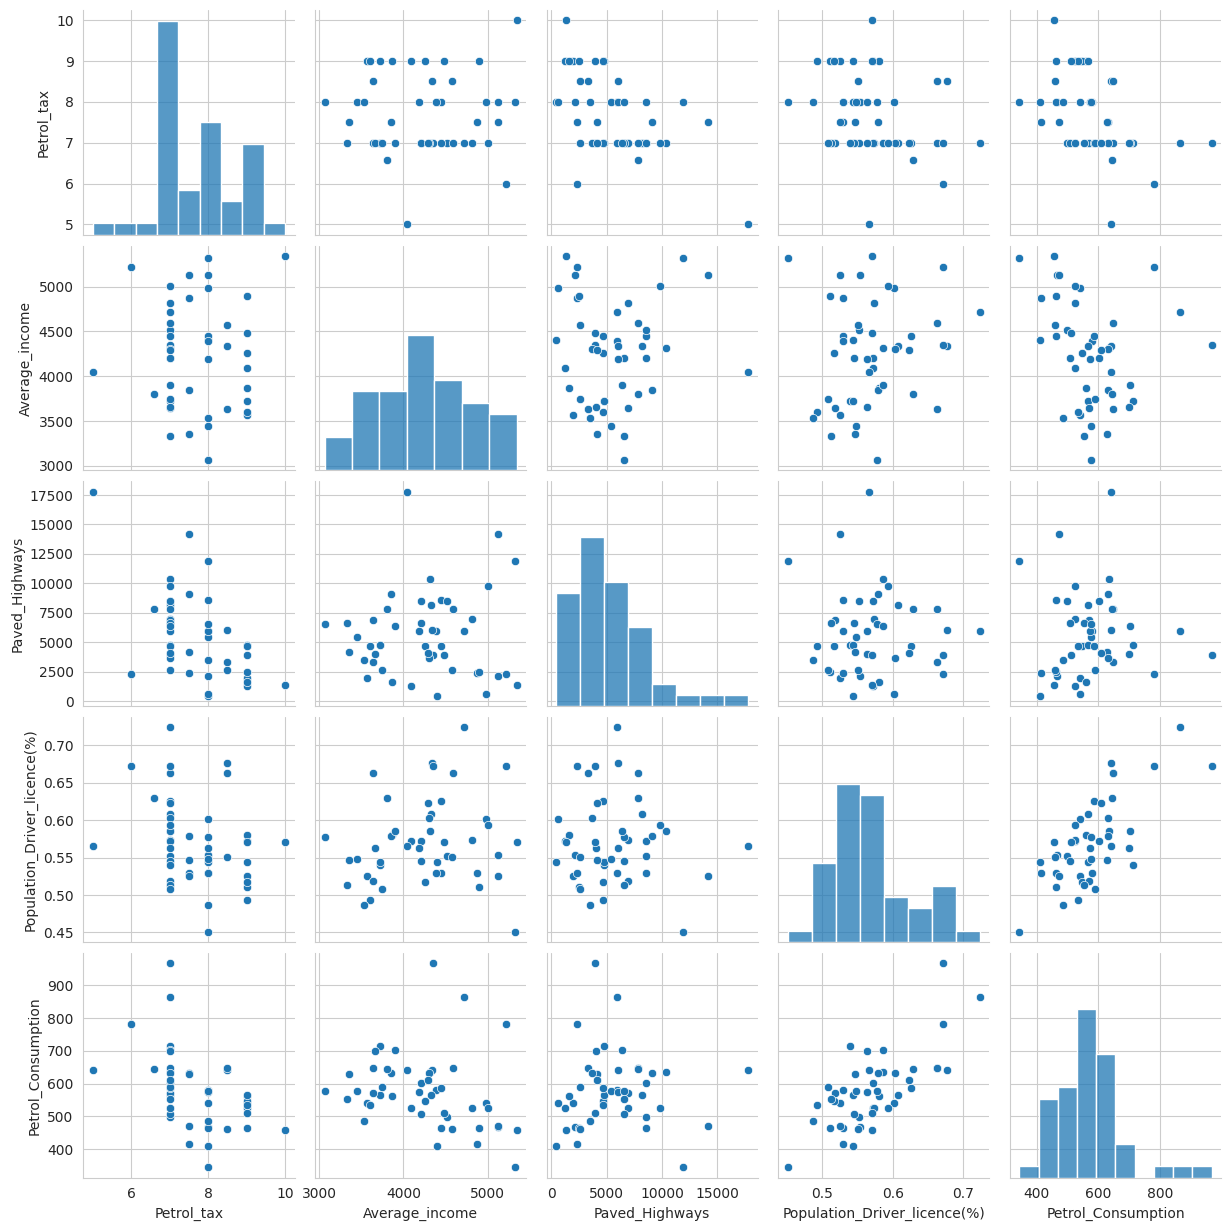

In [16]:
sb.pairplot(cons)

In [17]:
correlations = cons.corr()
correlations

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


[Text(0.5, 1.0, 'Correlation berween parameters')]

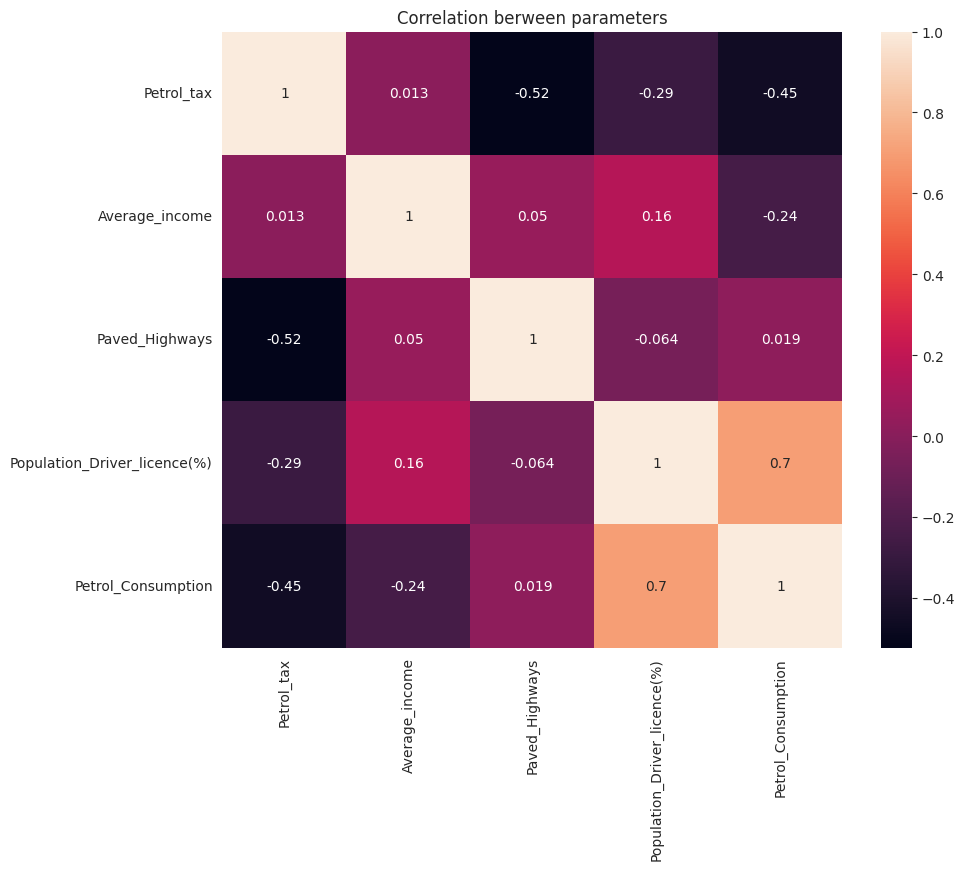

In [26]:
sb.heatmap(correlations, annot=True).set(title='Correlation berween parameters')

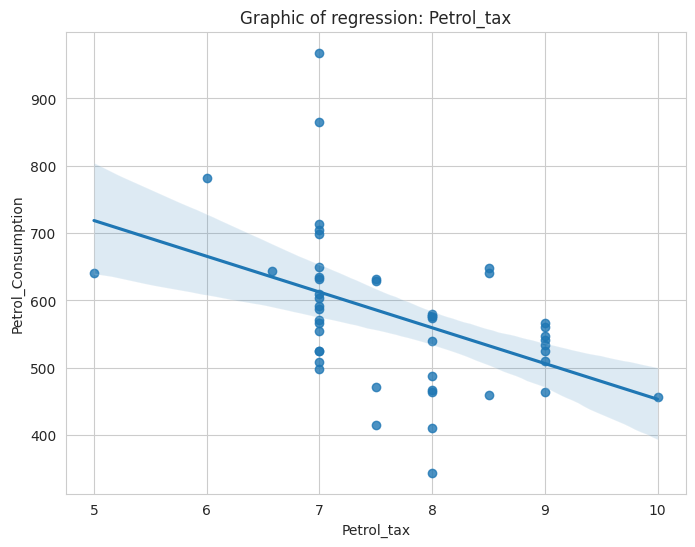

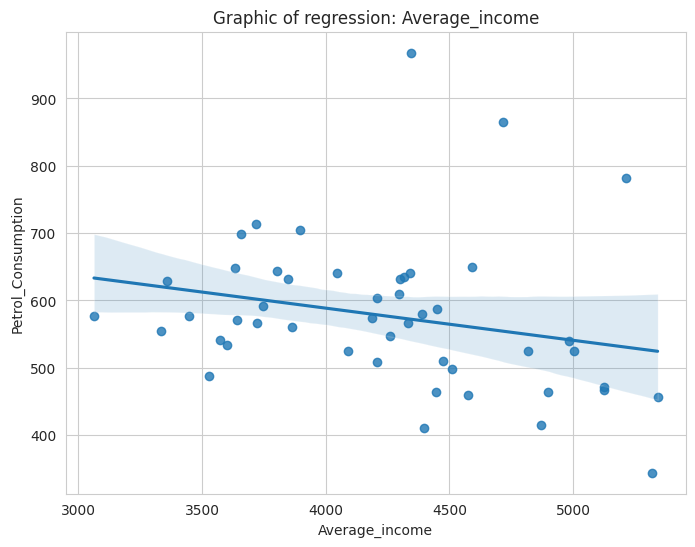

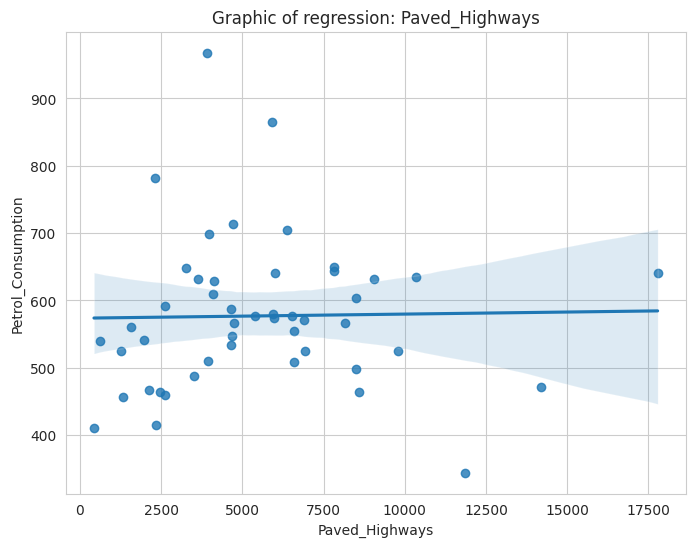

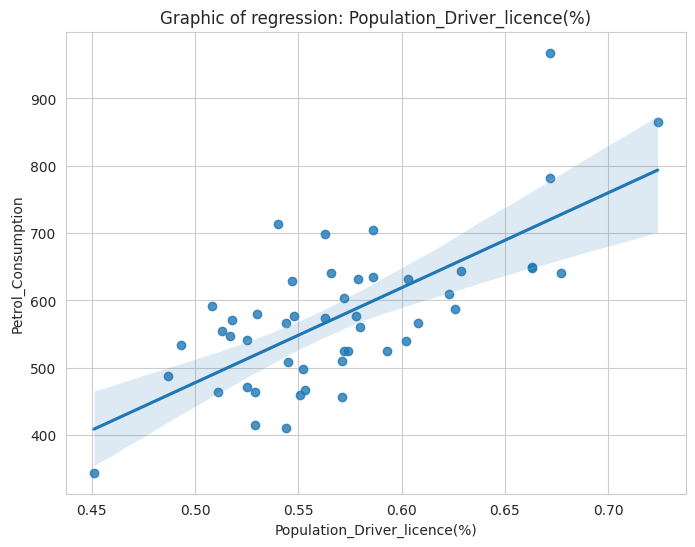

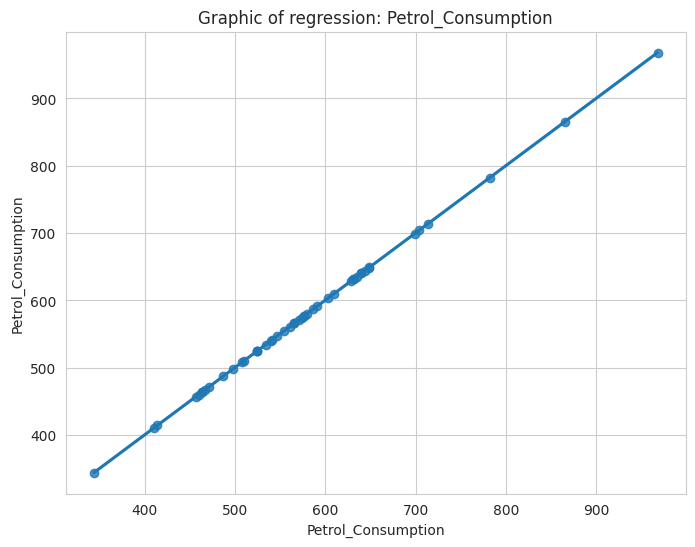

In [19]:
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)', 'Petrol_Consumption']

for var in variables:
    plt.figure(figsize=(8, 6), dpi=100)
    sb.regplot(x=var, y='Petrol_Consumption', data=cons).set(title=f'Graphic of regression: {var}')


In [30]:
cons_data = cons[['Population_Driver_licence(%)', 'Average_income']].values
cons_target = cons[['Petrol_Consumption']].values
cons_data_names = ['Population_Driver_licence(%)', 'Average_income']

# ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)', 'Petrol_Consumption']

X, y = scale(cons_data), cons_target



In [31]:
# Missing Values
missing_values = X == np.NAN
X[missing_values == True] 

array([], dtype=float64)

In [32]:
LinReg = LinearRegression()

LinReg.fit(X, y)

print(LinReg.score(X, y))

0.6175098135108323


In [33]:
print('intercept: ', LinReg.intercept_)
print('slope: ', LinReg.coef_)


intercept:  [576.77083333]
slope:  [[ 83.70870277 -40.25784231]]


In [34]:
y_pred = LinReg.predict(X)
print('prediction: ', y_pred, sep='\n')


prediction: 
[[555.21393909]
 [589.93939547]
 [618.23955423]
 [469.18344745]
 [525.46443514]
 [499.75898   ]
 [318.38509246]
 [487.62785642]
 [499.18442553]
 [529.65033255]
 [504.68122911]
 [444.9266556 ]
 [541.56936515]
 [540.60694325]
 [627.81910786]
 [595.26110452]
 [581.85402549]
 [567.66371058]
 [777.48915225]
 [732.40874835]
 [693.18522483]
 [572.49713249]
 [439.81771944]
 [494.28860323]
 [523.72798318]
 [573.55110923]
 [599.01361415]
 [618.062073  ]
 [569.40527688]
 [504.28483778]
 [539.64486232]
 [553.79340739]
 [672.0707555 ]
 [603.94268238]
 [500.31205421]
 [697.43488645]
 [584.12258016]
 [625.12023401]
 [761.13070237]
 [724.49983673]
 [646.97173694]
 [607.13700345]
 [622.46347096]
 [516.94738215]
 [662.79569741]
 [561.17942213]
 [653.24802589]
 [557.42418485]]


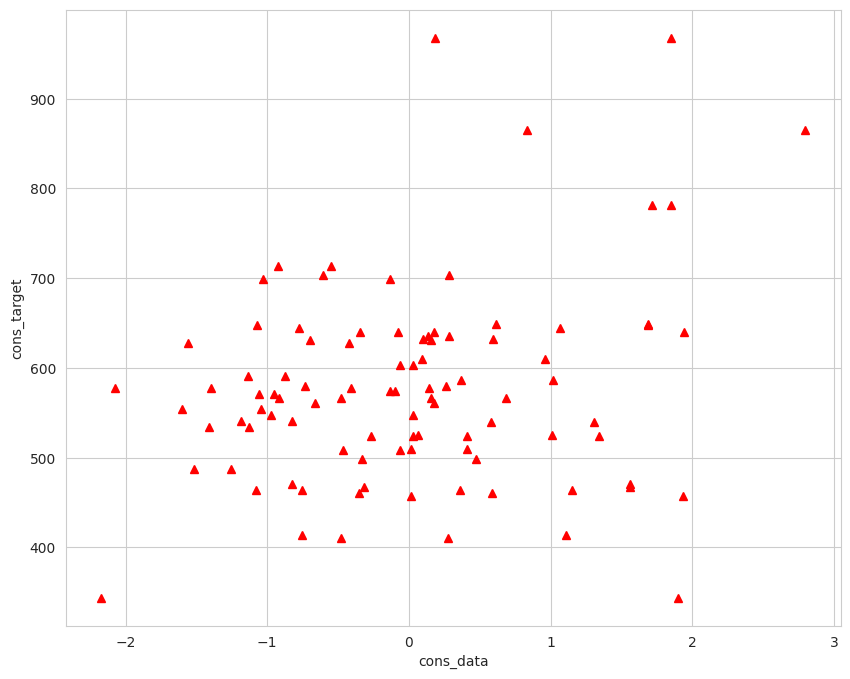

In [35]:
plt.plot(X, y, 'r^')
plt.xlabel('cons_data')
plt.ylabel('cons_target')
plt.show()

